## Step 0 Import libraries and Data loading

In [1]:
import os
import re
import math
import copy
import numpy as np
import pandas as pd
import seaborn as sns
from tsne import bh_sne
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from scipy.spatial.distance import pdist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.cluster.hierarchy import ward, fcluster, dendrogram, linkage

In [2]:
%matplotlib inline
sns.set()

In [3]:
#list of feature names
columns = ['Product_Name', 'Category', 'Sub_Category', 'Brand', 
           'Dispensary_Name', 'Average_Price', 'Max_Price', 'Min_Price', 
           'Units_of_Measure', 'Unit_Weight_in_Grams', 'POS', 'WebSite']

In [4]:
%%time
INP_DNAME = os.getcwd()
data_fname = 'PistilAllData.csv'
os.path.join(INP_DNAME, data_fname), 
df_input_data = pd.read_csv(os.path.join(INP_DNAME, data_fname), names = columns)

Wall time: 5.12 s


In [5]:
df_input_data.head()

,Product_Name,Category,Sub_Category,Brand,Dispensary_Name,Average_Price,Max_Price,Min_Price,Units_of_Measure,Unit_Weight_in_Grams,POS,WebSite
0,\tQUEEN BEE Flodu Shatter 1g,INHALABLES,DABBABLE CONCENTRATES,Unbranded,Satori Bellingham,20.000000,20.0,20.0,60.0,Unit,NaN,Baker
1,7 Points - Lime OG**B2SS**,INHALABLES,FLOWER - BRANDED,Lime,Cannabend,192.000000,192.0,192.0,0.0,1oz,0.0,Dutchie
2,Blizzard Buds Bulk,INHALABLES,FLOWER - BRANDED,Unbranded,Greenfield's Medical Dispensary,7.010753,8.0,7.0,0.0,Gram,1.0,Baker
3,Breakfast Buds Bulk,INHALABLES,FLOWER - BRANDED,Unbranded,Greenfield's Medical Dispensary,7.071429,8.0,7.0,0.0,Gram,1.0,Baker
4,BUBBA KUSH 1G VAPE CARTRIDGE,INHALABLES,VAPE UNIVERSAL 510,Unbranded,Apothekare - Mission Valley,50.000000,50.0,50.0,150.0,Unit,NaN,Baker


In [6]:
df_input_data.shape

(1996267, 12)

## Block 1 Filling empty values

In [7]:
#list of signs requiring processing
features_names = ['Product_Name', 'Category', 'Sub_Category', 
                  'Brand', 'Dispensary_Name', 'Unit_Weight_in_Grams', 
                  'POS', 'WebSite']

In [8]:
df_data_1 = copy.deepcopy(df_input_data)

In [9]:
%%time
#fill in all missing cells with the word "Unknown"
df_data_1 = df_data_1.fillna('Unknown')

Wall time: 1.26 s


In [10]:
df_data_1.head()

,Product_Name,Category,Sub_Category,Brand,Dispensary_Name,Average_Price,Max_Price,Min_Price,Units_of_Measure,Unit_Weight_in_Grams,POS,WebSite
0,\tQUEEN BEE Flodu Shatter 1g,INHALABLES,DABBABLE CONCENTRATES,Unbranded,Satori Bellingham,20.000000,20.0,20.0,60.0,Unit,Unknown,Baker
1,7 Points - Lime OG**B2SS**,INHALABLES,FLOWER - BRANDED,Lime,Cannabend,192.000000,192.0,192.0,0.0,1oz,0,Dutchie
2,Blizzard Buds Bulk,INHALABLES,FLOWER - BRANDED,Unbranded,Greenfield's Medical Dispensary,7.010753,8.0,7.0,0.0,Gram,1,Baker
3,Breakfast Buds Bulk,INHALABLES,FLOWER - BRANDED,Unbranded,Greenfield's Medical Dispensary,7.071429,8.0,7.0,0.0,Gram,1,Baker
4,BUBBA KUSH 1G VAPE CARTRIDGE,INHALABLES,VAPE UNIVERSAL 510,Unbranded,Apothekare - Mission Valley,50.000000,50.0,50.0,150.0,Unit,Unknown,Baker


## Block 2 Removing useless characters

In [11]:
df_data_2 = copy.deepcopy(df_data_1)

In [12]:
#the function removes all non-alphabetic characters from the dataset. Removal is carried out by regular expression.
#Input: a list with the names of the characteristics. The name of the data frame.
#Function returns: cleared data frame

def fun_del_sumbols(column_name, df_data_2):
    bards_words = df_data_2[column_name]
    bards_words = bards_words.tolist()
    df_data_2[column_name] = [re.sub(r'\W+', ' ', bards_words[i]) 
                              for i in range(0, len(bards_words))] 
    return df_data_2

In [13]:
%%time
df_data_2 = fun_del_sumbols('Product_Name', df_data_2)

Wall time: 4.89 s


In [14]:
df_data_2.head()

,Product_Name,Category,Sub_Category,Brand,Dispensary_Name,Average_Price,Max_Price,Min_Price,Units_of_Measure,Unit_Weight_in_Grams,POS,WebSite
0,QUEEN BEE Flodu Shatter 1g,INHALABLES,DABBABLE CONCENTRATES,Unbranded,Satori Bellingham,20.000000,20.0,20.0,60.0,Unit,Unknown,Baker
1,7 Points Lime OG B2SS,INHALABLES,FLOWER - BRANDED,Lime,Cannabend,192.000000,192.0,192.0,0.0,1oz,0,Dutchie
2,Blizzard Buds Bulk,INHALABLES,FLOWER - BRANDED,Unbranded,Greenfield's Medical Dispensary,7.010753,8.0,7.0,0.0,Gram,1,Baker
3,Breakfast Buds Bulk,INHALABLES,FLOWER - BRANDED,Unbranded,Greenfield's Medical Dispensary,7.071429,8.0,7.0,0.0,Gram,1,Baker
4,BUBBA KUSH 1G VAPE CARTRIDGE,INHALABLES,VAPE UNIVERSAL 510,Unbranded,Apothekare - Mission Valley,50.000000,50.0,50.0,150.0,Unit,Unknown,Baker


## Block  3 Hashing all features besides Product_Name

In [15]:
#the function calculates a hash for the values of a particular attribute. 
#The function receives: an array of the number of unique attribute values.
#The function returns a key hash dictionary

def fun_hash(number_of_unique_characteristic_values):
    return {s:hash(s) for s in number_of_unique_characteristic_values}

In [16]:
df_data_3 = copy.deepcopy(df_data_2)

In [17]:
%%time
for i in range(1, len(features_names)):
    df_data_3[features_names[i]] = df_data_3[features_names[i]].map(fun_hash(df_data_3[features_names[i]].unique()))

Wall time: 2.49 s


In [18]:
df_data_3.head()

,Product_Name,Category,Sub_Category,Brand,Dispensary_Name,Average_Price,Max_Price,Min_Price,Units_of_Measure,Unit_Weight_in_Grams,POS,WebSite
0,QUEEN BEE Flodu Shatter 1g,5284415587214034298,31154582988397159,1066426988428449588,-2619962510136022281,20.000000,20.0,20.0,60.0,2994352575485239791,9171752337872869959,3420140999727323215
1,7 Points Lime OG B2SS,5284415587214034298,-375946904404843212,-5053438372704391284,-4183212625948289803,192.000000,192.0,192.0,0.0,4713022055691634168,0,-871970097362152417
2,Blizzard Buds Bulk,5284415587214034298,-375946904404843212,1066426988428449588,-2419490985776855867,7.010753,8.0,7.0,0.0,3330436816204441893,1,3420140999727323215
3,Breakfast Buds Bulk,5284415587214034298,-375946904404843212,1066426988428449588,-2419490985776855867,7.071429,8.0,7.0,0.0,3330436816204441893,1,3420140999727323215
4,BUBBA KUSH 1G VAPE CARTRIDGE,5284415587214034298,-1678980568989147798,1066426988428449588,3960179176155267169,50.000000,50.0,50.0,150.0,2994352575485239791,9171752337872869959,3420140999727323215


## Block 4 Hashing Product_Name

#### In the next version we will take into account flavours, weight/volume and probably brand names

In [19]:
df_data_additional = copy.deepcopy(df_data_3)

In [20]:
%%time
list_feature_measure = []
for i in range(len(df_data_additional['Product_Name'])):
    unit_measure = re.findall(r'\d+g|\d+mg|\d+kg|\d+l|\d+ml|\d+oz', 
                              df_data_additional['Product_Name'][i].lower()) 
    if unit_measure:
        list_feature_measure.append(str(unit_measure))
    else:
        list_feature_measure.append(str(unit_measure))

Wall time: 52.3 s


In [21]:
len(list_feature_measure)

1996267

In [22]:
df_data_additional['Measure'] = list_feature_measure + df_data_2['Unit_Weight_in_Grams']

In [23]:
def fun_del_sumbols(column_name, df_data_additional):
    bards_words = df_data_additional[column_name]
    bards_words = bards_words.tolist()
    df_data_additional[column_name] = [re.sub(r'\W+', ' ', bards_words[i]) 
                                      for i in range(0, len(bards_words))] 
    return df_data_additional

In [24]:
%%time
df_data_additional = fun_del_sumbols('Measure', df_data_additional)

Wall time: 3.08 s


In [25]:
df_data_additional.head(3)

,Product_Name,Category,Sub_Category,Brand,Dispensary_Name,Average_Price,Max_Price,Min_Price,Units_of_Measure,Unit_Weight_in_Grams,POS,WebSite,Measure
0,QUEEN BEE Flodu Shatter 1g,5284415587214034298,31154582988397159,1066426988428449588,-2619962510136022281,20.000000,20.0,20.0,60.0,2994352575485239791,9171752337872869959,3420140999727323215,1g Unit
1,7 Points Lime OG B2SS,5284415587214034298,-375946904404843212,-5053438372704391284,-4183212625948289803,192.000000,192.0,192.0,0.0,4713022055691634168,0,-871970097362152417,1oz
2,Blizzard Buds Bulk,5284415587214034298,-375946904404843212,1066426988428449588,-2419490985776855867,7.010753,8.0,7.0,0.0,3330436816204441893,1,3420140999727323215,Gram


In [26]:
df_data_additional_v2 = copy.deepcopy(df_data_additional)

In [27]:
df_data_measure = df_data_additional_v2.drop('Unit_Weight_in_Grams', axis=1)

In [28]:
df_data_measure.head(1)

,Product_Name,Category,Sub_Category,Brand,Dispensary_Name,Average_Price,Max_Price,Min_Price,Units_of_Measure,POS,WebSite,Measure
0,QUEEN BEE Flodu Shatter 1g,5284415587214034298,31154582988397159,1066426988428449588,-2619962510136022281,20.0,20.0,20.0,60.0,9171752337872869959,3420140999727323215,1g Unit


In [29]:
df_data_measure = df_data_measure.rename(columns={"Measure": "Unit_Weight_in_Grams"})

In [30]:
df_data_measure.head(2)

,Product_Name,Category,Sub_Category,Brand,Dispensary_Name,Average_Price,Max_Price,Min_Price,Units_of_Measure,POS,WebSite,Unit_Weight_in_Grams
0,QUEEN BEE Flodu Shatter 1g,5284415587214034298,31154582988397159,1066426988428449588,-2619962510136022281,20.0,20.0,20.0,60.0,9171752337872869959,3420140999727323215,1g Unit
1,7 Points Lime OG B2SS,5284415587214034298,-375946904404843212,-5053438372704391284,-4183212625948289803,192.0,192.0,192.0,0.0,0,-871970097362152417,1oz


#### taste

In [47]:
tastes = ['chocolate', 'cherry', 'butter', 
          'banana', 'lemon', 'citrus', 
          'lime' , 'coconut', 'strawberry',
          'raspberry']

In [48]:
def func_find_taste(tastes, df_data_additional, i, column_name):
    for taste in tastes:
        if taste in df_data_additional[column_name][i].lower():
            return taste

In [49]:
list_taste = []

In [50]:
for i in range(len(df_data_additional['Product_Name'])):       
    list_taste.append(func_find_taste(tastes, df_data_additional, i, 'Product_Name'))

In [51]:
len(df_data_additional['Product_Name'])

1996267

In [52]:
len(list_taste)

1996267

In [54]:
df_data_additional['Tastes'] = list_taste

In [71]:
df_data_additional.head(1)

,Product_Name,Category,Sub_Category,Brand,Dispensary_Name,Average_Price,Max_Price,Min_Price,Units_of_Measure,Unit_Weight_in_Grams,POS,WebSite,Measure,Tastes
0,QUEEN BEE Flodu Shatter 1g,5284415587214034298,31154582988397159,1066426988428449588,-2619962510136022281,20.0,20.0,20.0,60.0,2994352575485239791,9171752337872869959,3420140999727323215,1g Unit,None


In [94]:
df_data_4 = copy.deepcopy(df_data_additional)

In [95]:
df_data_4 = df_data_4.fillna('Unknown')

In [97]:
df_data_4 = df_data_4.drop('Unit_Weight_in_Grams', axis=1)

In [98]:
df_data_4['Product_Name'] = df_data_4['Product_Name'].map(fun_hash(df_data_4['Product_Name'].unique()))
df_data_4['Measure'] = df_data_4['Measure'].map(fun_hash(df_data_4['Measure'].unique()))
df_data_4['Tastes'] = df_data_4['Tastes'].map(fun_hash(df_data_4['Tastes'].unique()))

In [99]:
df_data_4.head(10)

,Product_Name,Category,Sub_Category,Brand,Dispensary_Name,Average_Price,Max_Price,Min_Price,Units_of_Measure,POS,WebSite,Measure,Tastes
0,2161734399126102019,5284415587214034298,31154582988397159,1066426988428449588,-2619962510136022281,20.000000,20.0,20.0,60.0,9171752337872869959,3420140999727323215,-489254663449651465,9171752337872869959
1,-7099799818675063322,5284415587214034298,-375946904404843212,-5053438372704391284,-4183212625948289803,192.000000,192.0,192.0,0.0,0,-871970097362152417,-1498824707229049558,4958077097826977773
2,3366636148553406119,5284415587214034298,-375946904404843212,1066426988428449588,-2419490985776855867,7.010753,8.0,7.0,0.0,1,3420140999727323215,-7420549933081224112,9171752337872869959
3,8608696111857900943,5284415587214034298,-375946904404843212,1066426988428449588,-2419490985776855867,7.071429,8.0,7.0,0.0,1,3420140999727323215,-7420549933081224112,9171752337872869959
4,-4936836096382312518,5284415587214034298,-1678980568989147798,1066426988428449588,3960179176155267169,50.000000,50.0,50.0,150.0,9171752337872869959,3420140999727323215,-489254663449651465,9171752337872869959
5,7079647527467129688,-7070385082702278293,-5601782484265406701,1066426988428449588,-7494357039488534414,18.000000,18.0,18.0,108.0,0,-871970097362152417,-2673888999688034967,3601853612830344848
6,7079647527467129688,-7070385082702278293,-5601782484265406701,1066426988428449588,-7494357039488534414,18.000000,18.0,18.0,162.0,0,-871970097362152417,-2673888999688034967,3601853612830344848
7,6766475680056026104,-7070385082702278293,-4161792278212538957,1066426988428449588,-7494357039488534414,4.000000,4.0,4.0,0.0,0,-871970097362152417,1813780160113508646,-4525336981747746592
8,6794498476685330063,-7070385082702278293,-7095255654277152127,1066426988428449588,-2984919557471225238,40.000000,40.0,40.0,0.0,9171752337872869959,3420140999727323215,-2280973703210911243,-4360271072852623985
9,-7123502183736503235,-7070385082702278293,-4161792278212538957,3640777137747981399,3960179176155267169,4.000000,4.0,4.0,0.0,9171752337872869959,3420140999727323215,2831169626390664657,9171752337872869959


In [106]:
df_data_4.columns

Index(['Product_Name', 'Category', 'Sub_Category', 'Brand', 'Dispensary_Name',
       'Average_Price', 'Max_Price', 'Min_Price', 'Units_of_Measure', 'POS',
       'WebSite', 'Measure', 'Tastes'],
      dtype='object')

In [107]:
new_columns = ['Product_Name', 'Category', 'Sub_Category', 'Brand', 
               'Dispensary_Name', 'Average_Price', 'Max_Price', 'Min_Price', 
               'Units_of_Measure', 'POS', 'WebSite', 'Measure', 'Tastes']

## Block 5 Standardization of features values

In [108]:
df_data_5 = copy.deepcopy(df_data_4)

In [109]:
std_scaler = StandardScaler()

In [110]:
%%time
X_scaled = std_scaler.fit_transform(df_data_5)

Wall time: 1.12 s


In [111]:
df_data_5 = pd.DataFrame(data=X_scaled, columns=new_columns)

In [112]:
df_data_5.head()

,Product_Name,Category,Sub_Category,Brand,Dispensary_Name,Average_Price,Max_Price,Min_Price,Units_of_Measure,POS,WebSite,Measure,Tastes
0,0.404887,0.481863,0.210013,0.119226,-0.478602,-0.019034,-0.017362,-0.059702,-0.008305,2.343298,2.422718,-0.046298,0.295520
1,-1.328530,0.481863,0.111742,-1.520884,-0.768464,0.167578,0.147833,0.568609,-0.016544,-0.442319,-0.595634,-0.227853,-1.292861
2,0.630401,0.481863,0.111742,0.119226,-0.441430,-0.033127,-0.028887,-0.107190,-0.016544,-0.442319,2.422718,-1.292785,0.295520
3,1.611521,0.481863,0.111742,0.119226,-0.441430,-0.033061,-0.028887,-0.107190,-0.016544,-0.442319,2.422718,-1.292785,0.295520
4,-0.923703,0.481863,-0.202799,0.119226,0.741505,0.013514,0.011451,0.049888,0.004053,2.343298,2.422718,-0.046298,0.295520


## Block 6 Batch data splitting

#### At this stage it is not possible to process about 2 million records in one iteration. Therefore, processing is carried out by data fragments.

In [113]:
df_data_6 = copy.deepcopy(df_data_5)

In [114]:
df_data_6.head()

,Product_Name,Category,Sub_Category,Brand,Dispensary_Name,Average_Price,Max_Price,Min_Price,Units_of_Measure,POS,WebSite,Measure,Tastes
0,0.404887,0.481863,0.210013,0.119226,-0.478602,-0.019034,-0.017362,-0.059702,-0.008305,2.343298,2.422718,-0.046298,0.295520
1,-1.328530,0.481863,0.111742,-1.520884,-0.768464,0.167578,0.147833,0.568609,-0.016544,-0.442319,-0.595634,-0.227853,-1.292861
2,0.630401,0.481863,0.111742,0.119226,-0.441430,-0.033127,-0.028887,-0.107190,-0.016544,-0.442319,2.422718,-1.292785,0.295520
3,1.611521,0.481863,0.111742,0.119226,-0.441430,-0.033061,-0.028887,-0.107190,-0.016544,-0.442319,2.422718,-1.292785,0.295520
4,-0.923703,0.481863,-0.202799,0.119226,0.741505,0.013514,0.011451,0.049888,0.004053,2.343298,2.422718,-0.046298,0.295520


In [115]:
df_data_6.shape[0] 

1996267

In [116]:
#group number to process
n = 1

In [117]:
batch_number = 50 #number of batches
batch_size = math.ceil(df_data_6.shape[0] / batch_number)
X_group_one = df_data_6.iloc[batch_size*(n - 1): batch_size*n]

In [118]:
X_group_one.shape

(39926, 13)

In [119]:
X_group_one.head()

,Product_Name,Category,Sub_Category,Brand,Dispensary_Name,Average_Price,Max_Price,Min_Price,Units_of_Measure,POS,WebSite,Measure,Tastes
0,0.404887,0.481863,0.210013,0.119226,-0.478602,-0.019034,-0.017362,-0.059702,-0.008305,2.343298,2.422718,-0.046298,0.295520
1,-1.328530,0.481863,0.111742,-1.520884,-0.768464,0.167578,0.147833,0.568609,-0.016544,-0.442319,-0.595634,-0.227853,-1.292861
2,0.630401,0.481863,0.111742,0.119226,-0.441430,-0.033127,-0.028887,-0.107190,-0.016544,-0.442319,2.422718,-1.292785,0.295520
3,1.611521,0.481863,0.111742,0.119226,-0.441430,-0.033061,-0.028887,-0.107190,-0.016544,-0.442319,2.422718,-1.292785,0.295520
4,-0.923703,0.481863,-0.202799,0.119226,0.741505,0.013514,0.011451,0.049888,0.004053,2.343298,2.422718,-0.046298,0.295520


## Block 7 Dimension reduction and visualization

In [120]:
#tsne = TSNE(n_components=2, random_state=0)
#data_tsne = tsne.fit_transform(X_train_one_group)

In [121]:
%%time
# decrease in dimension of feature space
X_group_one_2d = bh_sne(X_group_one)

Wall time: 1min 36s


In [122]:
X_group_one_2d

array([[  7.07700538,  24.69111994],
       [ -4.78633276,  -3.5487226 ],
       [ -7.84313263, -22.32011065],
       ...,
       [-29.8035617 ,  -7.50206271],
       [-12.927724  ,  -2.40814168],
       [-14.5328686 , -35.06451643]])

In [123]:
# chart datagram tsne
df_tsne_graph = pd.DataFrame(X_group_one_2d, columns=['First_comp', 'Second_comp'])

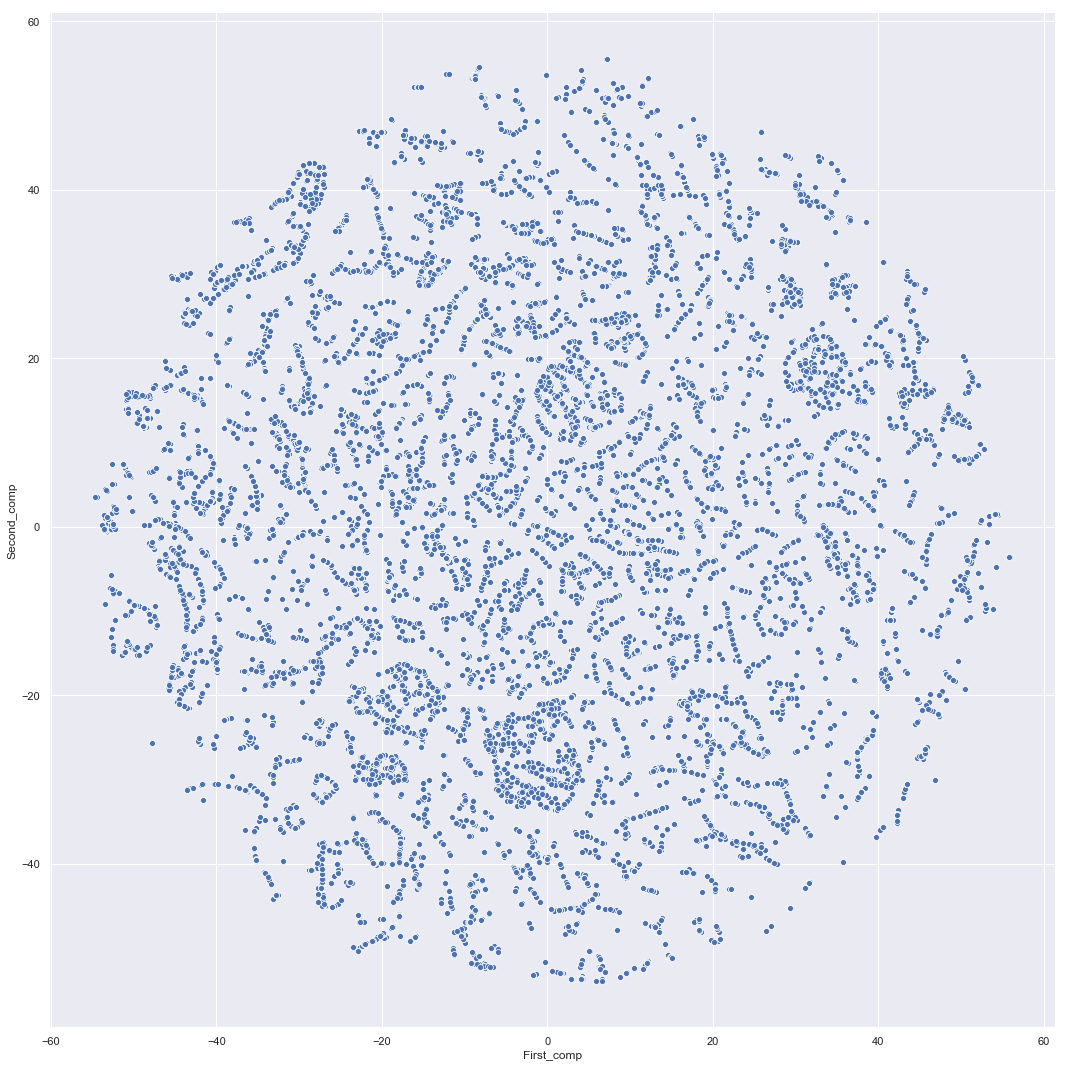

In [124]:
sns.relplot(x='First_comp', y='Second_comp', data=df_tsne_graph, height = 15);

## Block 8 Outliers removal

In [125]:
# function for finding outliers
def indexes_outlier(X, a=1):    
    return {item for column in X.columns 
            for item in X_group_one[(X_group_one[column] > a) | (X_group_one[column] < -a)].index}

In [126]:
X_group_one_without_outlier = X_group_one.drop(indexes_outlier(X_group_one, a=4.5), axis=0)

In [127]:
X_group_one.shape

(39926, 13)

In [128]:
X_group_one_without_outlier.shape

(39546, 13)

In [129]:
X_group_one_without_outlier.columns

Index(['Product_Name', 'Category', 'Sub_Category', 'Brand', 'Dispensary_Name',
       'Average_Price', 'Max_Price', 'Min_Price', 'Units_of_Measure', 'POS',
       'WebSite', 'Measure', 'Tastes'],
      dtype='object')

## Block 9 Data Clustering

In [130]:
# data clustering function
# input data: an array of objects after dimensionality reduction and a metric for assessing the proximity of objects (clusters)
# the function returns: cluster data frame, number of clusters, distance matrix
def func_clustering_data(X_group_one_2d_arr, similarity_metric):
    Z = linkage(X_group_one_2d_arr, 'ward')
    clusters = fcluster(Z, t=similarity_metric, criterion='distance')
    df_clust = pd.DataFrame(clusters, columns=['Number_claster'])
    amount_clusters = df_clust['Number_claster'].nunique()
    return df_clust, amount_clusters, Z

In [131]:
%%time
df_clust, amount_clusters, Z = func_clustering_data(X_group_one_2d, 0.01)

Wall time: 1min 12s


In [132]:
df_clust.head()

,Number_claster
0,7562
1,12470
2,5181
3,5184
4,7687


In [133]:
print(df_clust.shape[0])
print(amount_clusters)

39926
15817


In [136]:
#%%time
#fig = plt.figure(figsize=(25, 10))
#dn = dendrogram(Z)

## Block 10 Finding duplicates and evaluating results

In [137]:
def fun_search_for_cluster_objects(n_clus):    
    return [i for i in range(len(df_clust)) if df_clust['Number_claster'][i] == n_clus]

In [138]:
%%time
#dictionary in which: the key is the cluster number, 
#and the values are the line numbers of the data frame included in this cluster
number_cluster_dict = {df_clust['Number_claster'].unique()[i]: fun_search_for_cluster_objects(i) 
             for i in range(len(df_clust['Number_claster'].unique()))}

Wall time: 1h 26min 38s


In [139]:
#vocabulary
#keys: cluster number
#values: line numbers
number_cluster_dict

{7562: [],
 12470: [24405, 32610],
 5181: [22670, 25480],
 5184: [21082, 22376, 29757],
 7687: [12701, 17542, 18371, 19513],
 9245: [6130, 9189],
 9941: [5953],
 9914: [61, 219, 501, 785],
 5750: [6122, 7809],
 5747: [8278, 9175],
 5738: [7944],
 11143: [5452, 5872, 7519],
 14821: [7842, 8999],
 11972: [11887, 22257],
 8286: [6524, 7185, 8193],
 12432: [5818, 6332],
 462: [6046, 10252, 10493],
 9869: [6047, 6141],
 5735: [16170],
 5224: [22698, 34528],
 9393: [14430, 24401],
 8278: [24850],
 754: [6434, 8593],
 7509: [25485],
 6261: [6089],
 7511: [262, 1200],
 12861: [584, 658],
 14070: [7469, 10367],
 12471: [5412, 6468],
 12402: [24397],
 9811: [8105, 8545],
 5241: [7159, 7730],
 1698: [6929],
 5194: [22466, 30860],
 9985: [36964],
 12074: [38631],
 7700: [23891],
 5731: [37346],
 11293: [29938],
 10126: [4582, 6297],
 8088: [21172, 28297, 29414],
 14825: [14432, 26552],
 463: [15819, 16997, 16998],
 9243: [17817],
 10059: [18707, 22507],
 7622: [18131, 23387],
 10781: [21734],
 100

In [140]:
#list_dublicates = number_cluster_dict[10806]
#df_data_2.iloc[list_dublicates]

In [141]:
#total number of lines recorded in dictionary values ​​39924
sum_k = 0
for i in range(len(list(number_cluster_dict.values()))):
    k = len(list(number_cluster_dict.values())[i])
    sum_k = sum_k + k
print(sum_k+1)

39922


In [142]:
#number of keys in the dictionary. This is also the total number of clusters.
len(number_cluster_dict.keys())

15817

In [143]:
#additional vocabulary
# Used to estimate the number of objects in one cluster under different conditions

#dictionary whose clusters contain more than one object
count_cluster_dict = {i: len(number_cluster_dict[i]) 
                      for i in number_cluster_dict.keys() 
                      if len(number_cluster_dict[i]) > 1}

In [144]:
#number of objects to delete
sum(count_cluster_dict.values()) - len(count_cluster_dict.keys())

24105

In [145]:
values = []
values.clear()

In [146]:
# list with duplicate row numbers
values = []
for value in number_cluster_dict.values():
    values.extend(value)

In [147]:
#values

In [148]:
#number_cluster_dict

In [149]:
lst_drop_row = []

In [150]:
# the loop finds duplicate rows to be deleted and writes to the list
for key in number_cluster_dict.keys():
    if len(number_cluster_dict[key]) > 1:
        lst_drop_row.append(number_cluster_dict[key][1:])

In [151]:
lst_drop_row

[[32610],
 [25480],
 [22376, 29757],
 [17542, 18371, 19513],
 [9189],
 [219, 501, 785],
 [7809],
 [9175],
 [5872, 7519],
 [8999],
 [22257],
 [7185, 8193],
 [6332],
 [10252, 10493],
 [6141],
 [34528],
 [24401],
 [8593],
 [1200],
 [658],
 [10367],
 [6468],
 [8545],
 [7730],
 [30860],
 [6297],
 [28297, 29414],
 [26552],
 [16997, 16998],
 [22507],
 [23387],
 [17374],
 [14610, 15875, 19664],
 [12651, 14667],
 [15063, 17205],
 [23408],
 [11292, 12975, 13206, 15696, 16782, 18269],
 [17397],
 [23311, 23313],
 [15770, 20996],
 [17455, 20041],
 [17016, 18880, 20629],
 [8851],
 [15157, 15428, 19892],
 [17007, 19909],
 [21333],
 [18425, 18427],
 [10213],
 [6409],
 [8668],
 [9355, 9363],
 [11110],
 [10604, 10877],
 [10205],
 [10204],
 [10001],
 [9512],
 [10748],
 [7405],
 [24817, 27599, 28334],
 [24743, 25198, 27033],
 [29126, 32595],
 [20889],
 [22821],
 [29421],
 [30074],
 [16158, 20323, 20817],
 [18554, 18556],
 [12126, 12128, 12263],
 [13557, 13909, 13910, 16312, 16316, 17212, 17404],
 [14200, 

## Block 11 Testing Score

In [293]:
df_test = df_input_data.iloc[:batch_size]

In [294]:
df_test.head()

,Product_Name,Category,Sub_Category,Brand,Dispensary_Name,Average_Price,Max_Price,Min_Price,Units_of_Measure,Unit_Weight_in_Grams,POS,WebSite
0,\tQUEEN BEE Flodu Shatter 1g,INHALABLES,DABBABLE CONCENTRATES,Unbranded,Satori Bellingham,20.000000,20.0,20.0,60.0,Unit,NaN,Baker
1,7 Points - Lime OG**B2SS**,INHALABLES,FLOWER - BRANDED,Lime,Cannabend,192.000000,192.0,192.0,0.0,1oz,0.0,Dutchie
2,Blizzard Buds Bulk,INHALABLES,FLOWER - BRANDED,Unbranded,Greenfield's Medical Dispensary,7.010753,8.0,7.0,0.0,Gram,1.0,Baker
3,Breakfast Buds Bulk,INHALABLES,FLOWER - BRANDED,Unbranded,Greenfield's Medical Dispensary,7.071429,8.0,7.0,0.0,Gram,1.0,Baker
4,BUBBA KUSH 1G VAPE CARTRIDGE,INHALABLES,VAPE UNIVERSAL 510,Unbranded,Apothekare - Mission Valley,50.000000,50.0,50.0,150.0,Unit,NaN,Baker


In [295]:
df_test_drop_duplicate = df_test.drop_duplicates()

In [296]:
#checking the number of full duplicates in a subsample
number_of_absolute_duplicates = len(df_test) - len(df_test_drop_duplicate)

In [297]:
df_test_duplicate_alg = copy.deepcopy(df_test)

In [298]:
df_test_duplicate_alg.head(15)

,Product_Name,Category,Sub_Category,Brand,Dispensary_Name,Average_Price,Max_Price,Min_Price,Units_of_Measure,Unit_Weight_in_Grams,POS,WebSite
0,\tQUEEN BEE Flodu Shatter 1g,INHALABLES,DABBABLE CONCENTRATES,Unbranded,Satori Bellingham,20.000000,20.0,20.0,60.0,Unit,NaN,Baker
1,7 Points - Lime OG**B2SS**,INHALABLES,FLOWER - BRANDED,Lime,Cannabend,192.000000,192.0,192.0,0.0,1oz,0.0,Dutchie
2,Blizzard Buds Bulk,INHALABLES,FLOWER - BRANDED,Unbranded,Greenfield's Medical Dispensary,7.010753,8.0,7.0,0.0,Gram,1.0,Baker
3,Breakfast Buds Bulk,INHALABLES,FLOWER - BRANDED,Unbranded,Greenfield's Medical Dispensary,7.071429,8.0,7.0,0.0,Gram,1.0,Baker
4,BUBBA KUSH 1G VAPE CARTRIDGE,INHALABLES,VAPE UNIVERSAL 510,Unbranded,Apothekare - Mission Valley,50.000000,50.0,50.0,150.0,Unit,NaN,Baker
5,CHERRY GUMMIES 100MG 10PC,INGESTIBLES,GUMMIES,Unbranded,East of Eden,18.000000,18.0,18.0,108.0,NaN,0.0,Dutchie
6,CHERRY GUMMIES 100MG 10PC,INGESTIBLES,GUMMIES,Unbranded,East of Eden,18.000000,18.0,18.0,162.0,NaN,0.0,Dutchie
7,COOKIE BUTTER 10MG,INGESTIBLES,INFUSED FOODS,Unbranded,East of Eden,4.000000,4.0,4.0,0.0,NaN,0.0,Dutchie
8,Dark Chocolate CBD Squares By Honu - 100mg CBD,INGESTIBLES,CHOCOLATE,Unbranded,A Greener Today Marijuana - Lynnwood,40.000000,40.0,40.0,0.0,Unit,NaN,Baker
9,DEMO COOKIES,INGESTIBLES,INFUSED FOODS,Kaneh Co.,Apothekare - Mission Valley,4.000000,4.0,4.0,0.0,Unit,NaN,Baker


In [299]:
# the loop deletes the rows. Row indices are stored in the lst_drop_row list
for i in range(len(lst_drop_row)):
    df_test_duplicate_alg = df_test_duplicate_alg.drop(lst_drop_row[i])

In [300]:
#calculating the number of duplicates after clustering
number_alg_duplicates = len(df_test) - len(df_test_duplicate_alg)

In [301]:
number_alg_duplicates_1 = 16992 
number_alg_duplicates_2 = 16246
number_alg_duplicates_3 = len(df_test_duplicate_alg)

In [309]:
df_graph_result = pd.DataFrame()

df_graph_result.loc[0, 'Fun Drop_duplicates'] = 100
df_graph_result.loc[0, 'After the algorithm'] = round(((number_alg_duplicates_1) / len(df_test))*100, 1)
df_graph_result.loc[0, 'After adding the taste'] = round(((number_alg_duplicates_3) / len(df_test))*100,1)

In [310]:
df_graph_result

,Fun Drop_duplicates,After the algorithm,After adding the taste
0,100.0,42.6,39.6


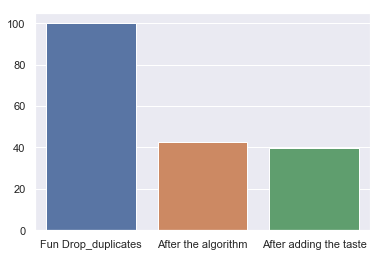

In [311]:
sns.barplot(data=df_graph_result)

## Output to file

In [59]:
df_input_data.iloc[values].to_csv('duplicates.csv', index=False)

In [66]:
df_input_data.shape

(1996267, 12)